# Lab 9

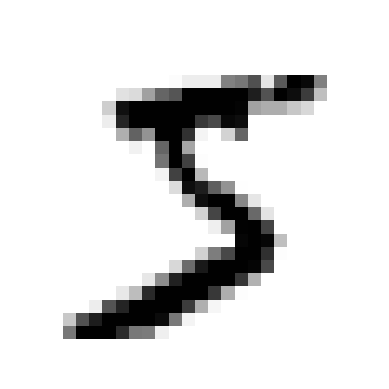

In [1]:
# Get the dataset
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784',as_frame=False)

dataset.keys()

#read the output of the command shown below
dataset.DESCR

dataset.data.shape

dataset.target.shape

# store data and target as X and y
X= dataset.data
y=dataset.target

# see first row of X
X[0]

#plot the first value of X
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28),cmap='binary')
plt.axis('off')
plt.show()


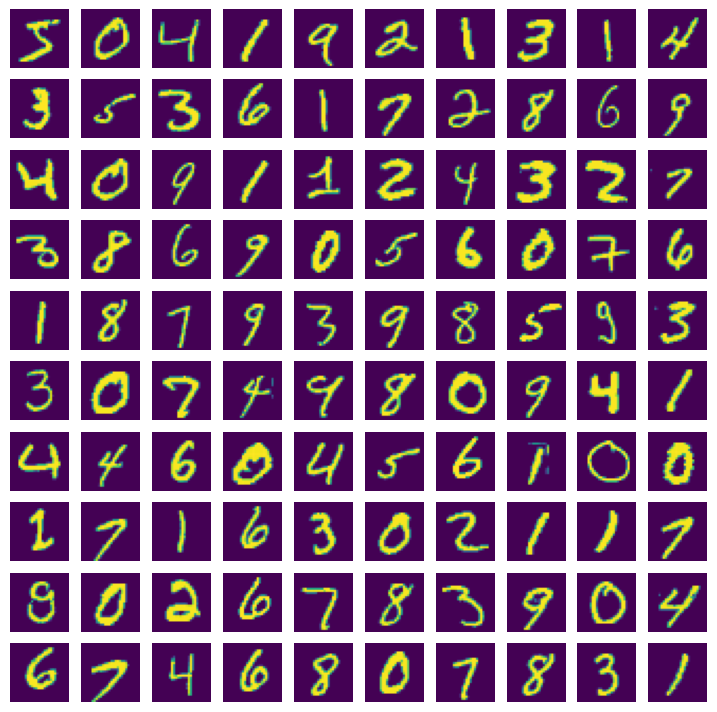

In [2]:
# let's print first 100 digits
plt.figure(figsize=(9, 9))
for i, d in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(d.reshape(28,28))
    plt.axis('off')

plt.show()


In [3]:
# check datatypes of X and y
X.dtype, y.dtype


(dtype('int64'), dtype('O'))

In [4]:
# we need to typecast y onto int
y=y.astype(int)
y.dtype
y[0]

np.int64(5)

In [5]:
# split the dataset for training and testing
# first 60000 rows each of 784 columns, we can use for training our model
X_train = X[0:60000]
y_train = y[0:60000]
# remaining data for testing purpose
X_test=X[60000:70000]
y_test=y[60000:70000]


In [6]:
# lets try convert the target for binary classification
# first we'll plan the binary classification digit 5 vs not-5
y_train_5 = (y_train==5)
# lets do the same for y_test
y_test_5= (y_test==5)


In [7]:
# see first five values of binary target
y_train_5[:5]

# see the actual values
y_train[:5]


array([5, 0, 4, 1, 9])

In [8]:
# take a classifer
from sklearn.linear_model import SGDClassifier

# Use the model
model = SGDClassifier(random_state=42)

# train the model with train dataset and target varliable
model.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [9]:
#predict the digit
model.predict([X_train[0]])


array([ True])

In [10]:
### Check the performance
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_5,cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [11]:
# Lets print Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,model.predict(X_train))
confusion_matrix(model.predict(X_test),y_test_5)


array([[8707,  107],
       [ 401,  785]])

In [12]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_train_5,model.predict(X_train))

precision_score(y_test_5,model.predict(X_test))

0.6618887015177066

In [13]:
#Recall
from sklearn.metrics import recall_score
recall_score( y_train_5, model.predict(X_train))

recall_score(y_test_5,model.predict(X_test))

0.8800448430493274

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_5, model.predict(X_train) )

f1_score(y_test_5, model.predict(X_test) )

0.7555341674687199

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, model.predict(X_train))

roc_auc_score(y_test_5, model.predict(X_test))

np.float64(0.918008807119745)

In [16]:
## Precision/Recall Trade-off
y_scores = model.decision_function([X[0]])
y_scores

threshold = 0
y_new_pred = (y_scores > threshold)
y_new_pred


array([ True])

In [17]:
threshold = 3000
y_new_pred = (y_scores > threshold)
y_new_pred

array([False])

In [18]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_train, y_train_5, cv=3,method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

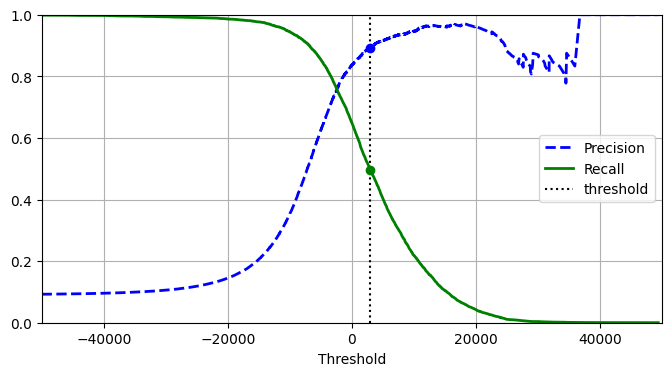

In [20]:
# plot the curve
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

# Lab 10

### Multiclass Classifier i.e. classify all the digits

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
model_mc = SGDClassifier(random_state=42)

In [23]:
model_mc.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_train, model_mc.predict(X_train), average='micro')

0.8807666666666667

In [26]:
f1_score(y_train, model_mc.predict(X_train), average='macro')

0.8815035770572374

In [27]:
f1_score(y_test, model_mc.predict(X_test), average='micro')

0.874

In [28]:
f1_score(y_test, model_mc.predict(X_test), average='macro')

0.8749260091812581

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, model_mc.predict(X_train)), accuracy_score(y_test, model_mc.predict(X_test))

(0.8807666666666667, 0.874)

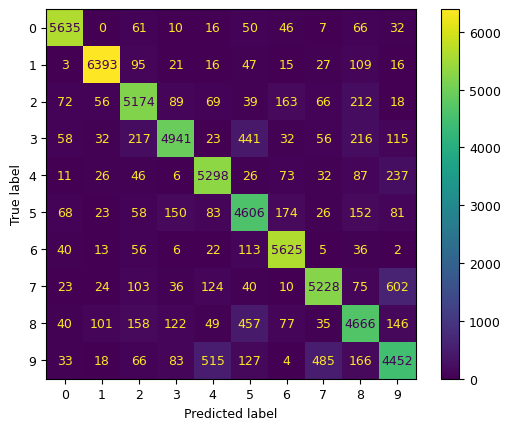

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(model_mc, X_train, y_train, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

### OneVsRestClassifier i.e. OVR

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [32]:
accuracy_score(y_train, ovr_clf.predict(X_train)), accuracy_score(y_test, ovr_clf.predict(X_test))

(0.9229166666666667, 0.9256)

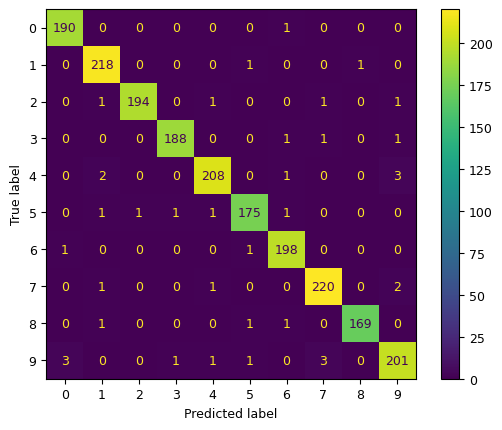

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
#y_train_pred = cross_val_predict(ovr_clf, X_train, y_train, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train[:2000], ovr_clf.predict(X_train[:2000]))
plt.show()

### Multilabel Classification

In [35]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [36]:
accuracy_score(y_multilabel, knn_clf.predict(X_train))

0.9856666666666667

In [37]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [39]:
# Lets use SGDClassifier for maultilabel output
# Initialize SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
# Wrap it in a MultiOutput Classifier to handle multilabel problem
from sklearn.multioutput import MultiOutputClassifier
multi_target_clf = MultiOutputClassifier(sgd_clf, n_jobs = -1)
#Train the model
multi_target_clf.fit(X_train, y_multilabel)
#Make predictions
y_pred = multi_target_clf.predict(X_train)
#Evaluate the model
accuracy = accuracy_score(y_multilabel, y_pred)
print(f"Accuracy P: {accuracy:.4f}")

Accuracy P: 0.7959


In [40]:
multi_target_clf.estimators_

[SGDClassifier(random_state=42), SGDClassifier(random_state=42)]

### Multioutput Classification

In [42]:
# Lets add some noise to the dataset
# then we train a model remove these noises from the dataset
np.random.seed(42)
# add noise to the train dataset
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
# add noise to the test dataset
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

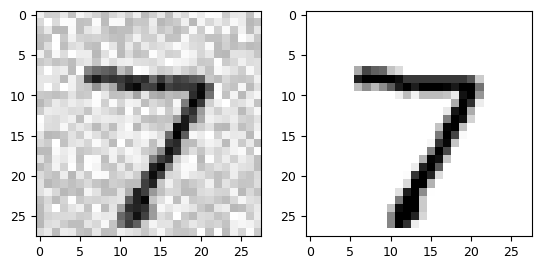

In [43]:
# Lets see how the noisy dataset and cleaned dataset appear on plot
plt.subplot(121);
plt.imshow(X_test_mod[0].reshape(28,28), cmap='binary')
plt.subplot(122);
plt.imshow(y_test_mod[0].reshape(28,28), cmap='binary')

In [44]:
# Now lets take a model
knn_clf = KNeighborsClassifier()
#train the model
knn_clf.fit(X_train_mod, y_train_mod)
#lets make prediction on the noisy digit
clean_digit = knn_clf.predict([X_test_mod[0]])

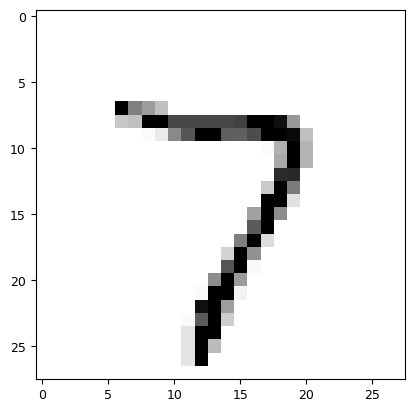

In [45]:
#lets plot the predicted digit
plt.imshow(clean_digit.reshape(28,28), cmap='binary')